<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## EncoDec

In [1]:
#| echo: false
#| output: asis
show_doc(EncoDec)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/audio/embedding.py#L28){target="_blank" style="float:right; font-size:smaller"}

### EncoDec

>      EncoDec (device:str='cpu')

Initialize self.  See help(type(self)) for accurate signature.

### Usage

wav: torch.Size([1, 102400]), code: torch.Size([1, 8, 480]) 


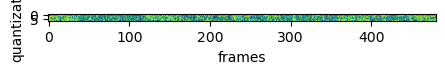

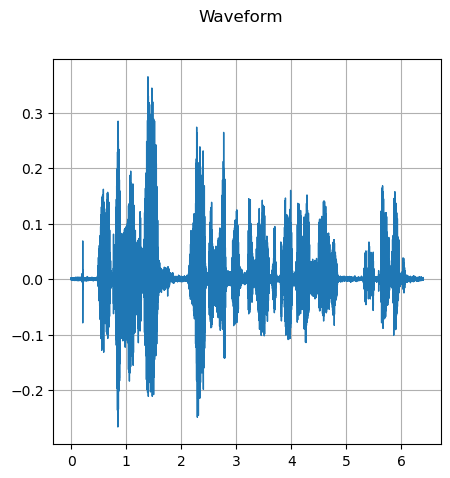

In [ ]:
wav, sr = torchaudio.load("../data/obama.wav")
# wav, sr = torch.rand((1, 24000)), 24000
# wav, sr = np.random.random((1, 24000)), 24000

encodec = EncoDec(device='cpu')
codes = encodec(wav,sr)
print(f"wav: {wav.shape}, code: {codes.shape} ")
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('frames')
plt.ylabel('quantization')
plt.imshow(codes.squeeze().cpu().numpy())
decoded = encodec.decode(codes)
plot_waveform(decoded.detach().cpu().squeeze(0), encodec.sample_rate)

torch.Size([480])


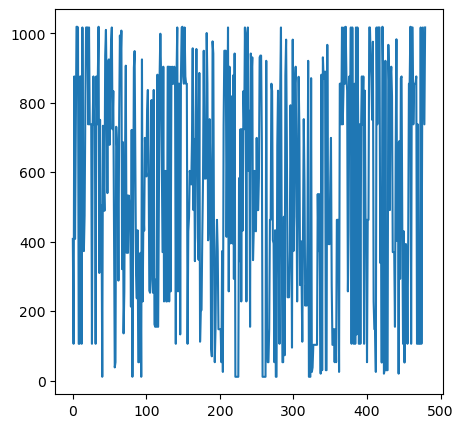

In [ ]:
plt.plot(codes[0][0])
print(codes[0][0].shape)

### Lhotse Feature extractor

In [2]:
#| echo: false
#| output: asis
show_doc(EncoDecExtractor)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/audio/embedding.py#L79){target="_blank" style="float:right; font-size:smaller"}

### EncoDecExtractor

>      EncoDecExtractor (config=EncoDecConfig(frame_shift=0.013333333333333334,
>                        n_q=8))

The base class for all feature extractors in Lhotse.
It is initialized with a config object, specific to a particular feature extraction method.
The config is expected to be a dataclass so that it can be easily serialized.

All derived feature extractors must implement at least the following:

* a ``name`` class attribute (how are these features called, e.g. 'mfcc')
* a ``config_type`` class attribute that points to the configuration dataclass type
* the ``extract`` method,
* the ``frame_shift`` property.

Feature extractors that support feature-domain mixing should additionally specify two static methods:

* ``compute_energy``, and
* ``mix``.

By itself, the ``FeatureExtractor`` offers the following high-level methods
that are not intended for overriding:

* ``extract_from_samples_and_store``
* ``extract_from_recording_and_store``

These methods run a larger feature extraction pipeline that involves data augmentation and disk storage.

In [3]:
#| echo: false
#| output: asis
show_doc(EncoDecConfig)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/audio/embedding.py#L73){target="_blank" style="float:right; font-size:smaller"}

### EncoDecConfig

>      EncoDecConfig (frame_shift:float=0.013333333333333334, n_q:int=8)

In [ ]:
encodec_extractor = EncoDecExtractor()
cuts = CutSet.from_file("../data/en/LJSpeech-1.1/first_3.jsonl.gz")
print(cuts[0])

MonoCut(id='LJ001-0001-0', start=0, duration=9.65501133786848, channel=0, supervisions=[SupervisionSegment(id='LJ001-0001', recording_id='LJ001-0001', start=0.0, duration=9.65501133786848, channel=0, text='Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition', language='English', speaker=None, gender='female', custom=None, alignment=None)], features=None, recording=Recording(id='LJ001-0001', sources=[AudioSource(type='file', channels=[0], source='/data/en/LJSpeech/LJSpeech-1.1/wavs/LJ001-0001.wav')], sampling_rate=22050, num_samples=212893, duration=9.65501133786848, channel_ids=[0], transforms=None), custom=None)


In [ ]:
# torch.set_num_threads(1)
# torch.set_num_interop_threads(1)

Extracting and storing features:   0%|          | 0/3 [00:00<?, ?it/s]

MonoCut(id='LJ001-0001-0', start=0, duration=9.65501133786848, channel=0, supervisions=[SupervisionSegment(id='LJ001-0001', recording_id='LJ001-0001', start=0.0, duration=9.65501133786848, channel=0, text='Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition', language='English', speaker=None, gender='female', custom=None, alignment=None)], features=Features(type='encodec', num_frames=724, num_features=8, frame_shift=0.013333333333333334, sampling_rate=22050, start=0, duration=9.65501134, storage_type='lilcom_chunky', storage_path='../data/en/LJSpeech-1.1/encodec.lca', storage_key='0,8029,3610', recording_id='None', channels=0), recording=Recording(id='LJ001-0001', sources=[AudioSource(type='file', channels=[0], source='/data/en/LJSpeech/LJSpeech-1.1/wavs/LJ001-0001.wav')], sampling_rate=22050, num_samples=212893, duration=9.65501133786848, channel_ids=[0], transforms=None), custom=None)


<matplotlib.image.AxesImage>

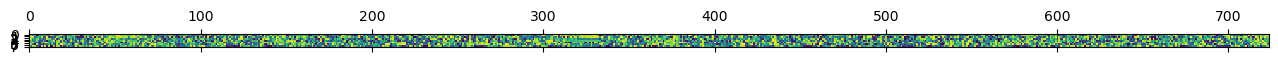

In [ ]:
# TODO: make it work with num_jobs>1
cuts = cuts.compute_and_store_features(
    extractor=encodec_extractor,
    storage_path="../data/en/LJSpeech-1.1/encodec",
    num_jobs=1,
)
cuts.to_file("../data/en/LJSpeech-1.1/cuts_encodec.jsonl.gz")
print(cuts[0])
cuts[0].plot_features()

In [ ]:
cuts = CutSet.from_file("../data/en/LJSpeech-1.1/cuts_encodec.jsonl.gz")

## AudioLM

In [ ]:
# TO DO